In [ ]:
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression

import numpy as np

import re

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

In [ ]:
# read into pandas dataframe
df = pd.read_csv("used_car_sales.csv")

In [ ]:
df

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD
3,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD
4,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122139,14948,4200,2019,80233,102700,Ford,Mustang,1977,NaN,302,Fastback,8,NaN
122140,58814,6500,2019,53132,128000,Ford,E-Series Van,2012,NaN,E-150,NaN,0,NaN
122141,2156,2000,2019,77536,50000,Ford,Bronco,1978,NaN,351m,NaN,8,4WD
122142,29096,2280,2019,92131,164337,BMW,3-Series,2000,328ci,M52TU 2.8L,Coupe,6,RWD


In [ ]:
df.describe()

,ID,pricesold,yearsold,Mileage,Year,NumCylinders
count,122144.000000,122144.000000,122144.000000,1.221440e+05,1.221440e+05,1.221440e+05
mean,85094.212397,10808.560715,2019.375467,1.404291e+06,3.959362e+03,1.758655e+04
std,47786.970812,13987.295760,0.503671,3.335593e+07,1.984514e+05,6.144603e+06
min,1.000000,0.000000,2018.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,44547.250000,2950.000000,2019.000000,4.479225e+04,1.977000e+03,4.000000e+00
50%,85555.500000,6500.000000,2019.000000,9.000000e+04,2.000000e+03,6.000000e+00
75%,127078.500000,13800.000000,2020.000000,1.402000e+05,2.008000e+03,8.000000e+00
max,165801.000000,404990.000000,2020.000000,1.235669e+09,2.014000e+07,2.147484e+09


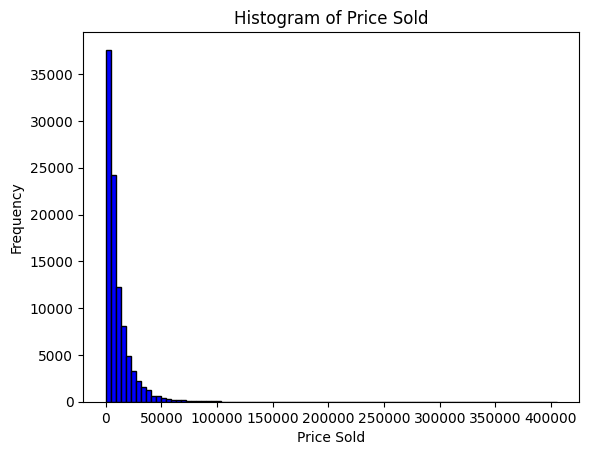

In [ ]:
# Plotting the histogram with more bins
plt.hist(df['pricesold'], bins=90, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Price Sold')
plt.ylabel('Frequency')
plt.title('Histogram of Price Sold')

# Displaying the plot
plt.show()

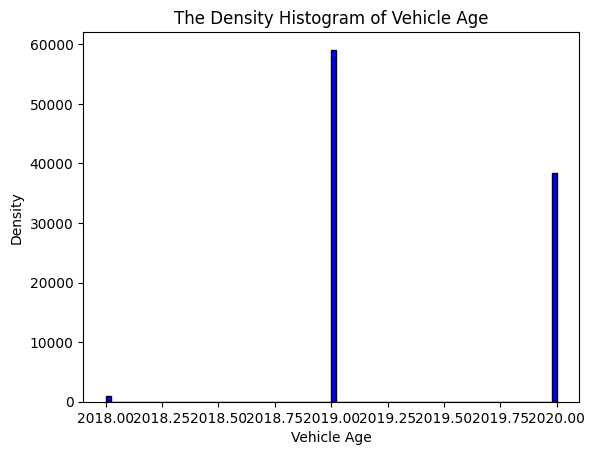

In [ ]:
# Plotting the histogram with more bins
plt.hist(df['yearsold'], bins=90, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Vehicle Age')
plt.ylabel('Density')
plt.title('The Density Histogram of Vehicle Age')

# Displaying the plot
plt.show()

pricesold        int64
yearsold         int64
Mileage          int64
Make            object
Model           object
Year             int64
Engine          object
BodyType        object
NumCylinders     int64
DriveType       object
dtype: object
122144
price removed:  11743  outliers
110401
price removed:  13950  outliers
96451
price removed:  15902  outliers
80549
price removed:  38562  outliers
(26422, 129)


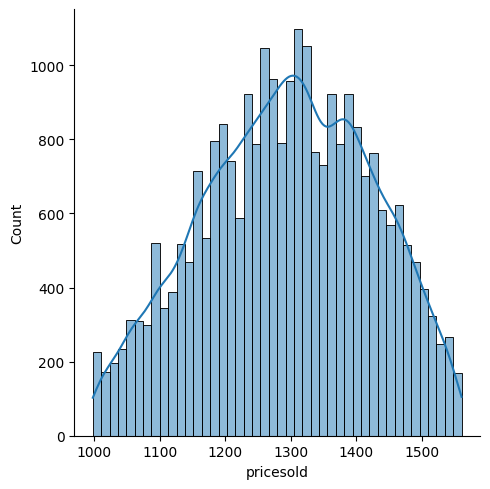

1360
1320
1277
1377
21137 train examples
5285 test examples


Linear Regression:
linear MAPE: 44.890548775416754
linear RSME: 5820.681978626334
linear R2: 0.6457558729716408


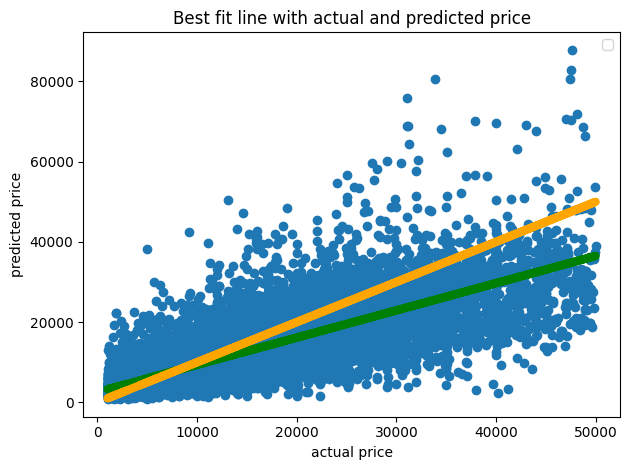

linear MAPE: 46.325834113513146
linear RSME: 5969.136375597109
linear R2: 0.6499672700215979


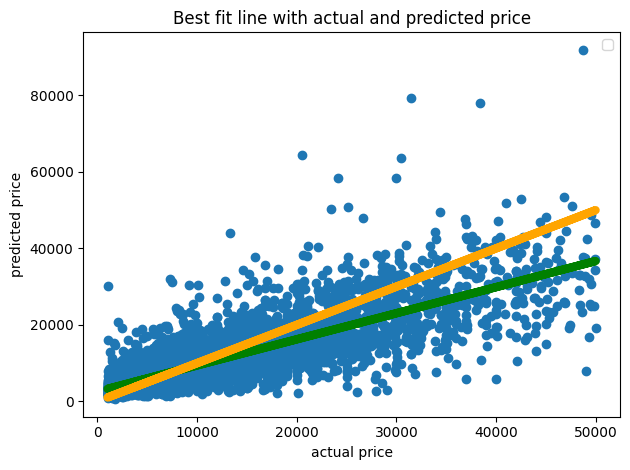

Ridge Regression:
ridge MAPE: 44.89056805904398
ridge RSME: 5820.616925861155
ridge R2: 0.6457637910923425


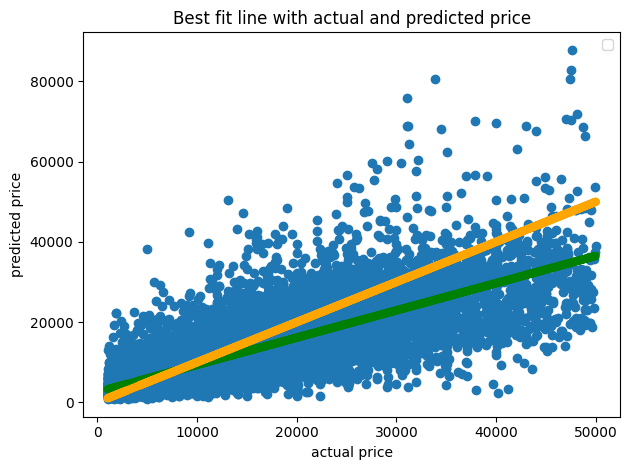

ridge MAPE: 46.325875278531505
ridge RSME: 5969.059965121119
ridge R2: 0.6499762314507358


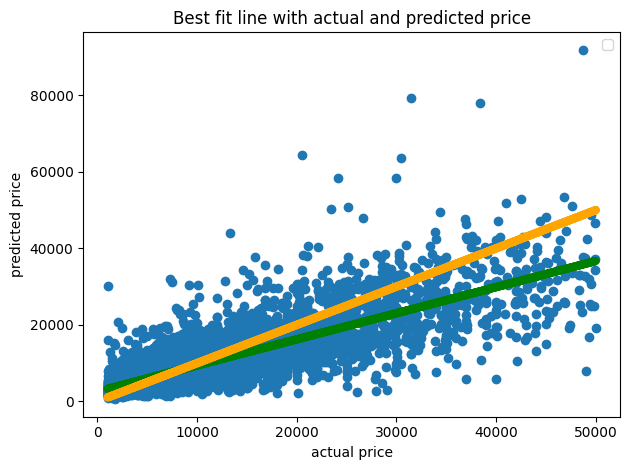

lasso MAPE: 44.91314130816676
lasso RSME: 5816.5046086727
lasso R2: 0.6462641562846697


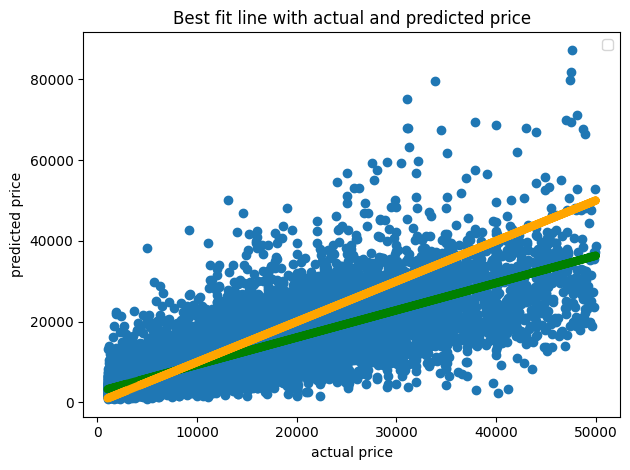

lasso MAPE: 46.36972694931304
lasso RSME: 5966.075482583576
lasso R2: 0.6503261621518037


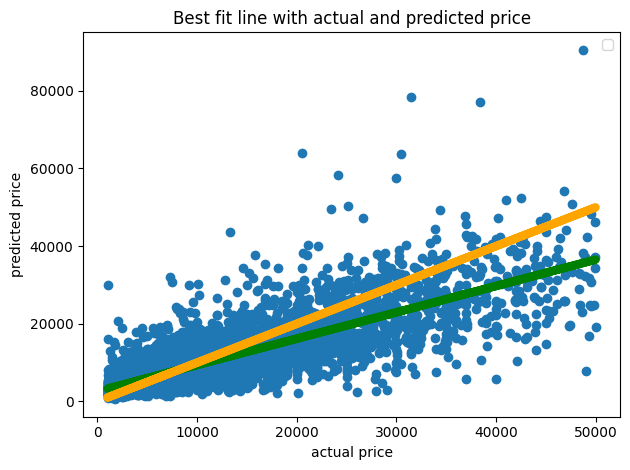

RF Regression:


RF MAPE: 12.869616615915424
RF RSME: 1982.8458212550986
RF R2: 0.9588913884761017


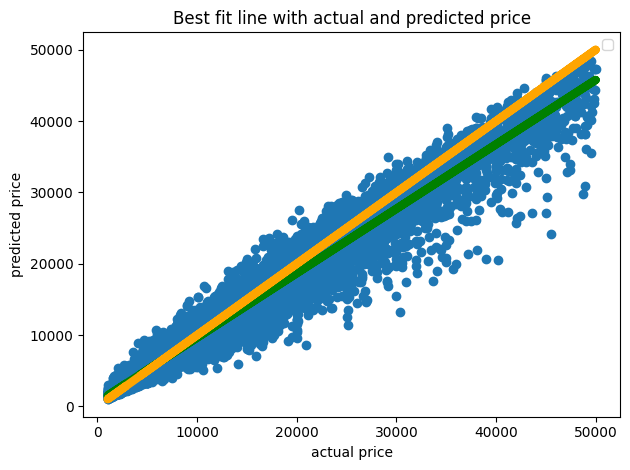

RF MAPE: 38.81974326298702
RF RSME: 4760.2520313657415
RF R2: 0.7773895504128551


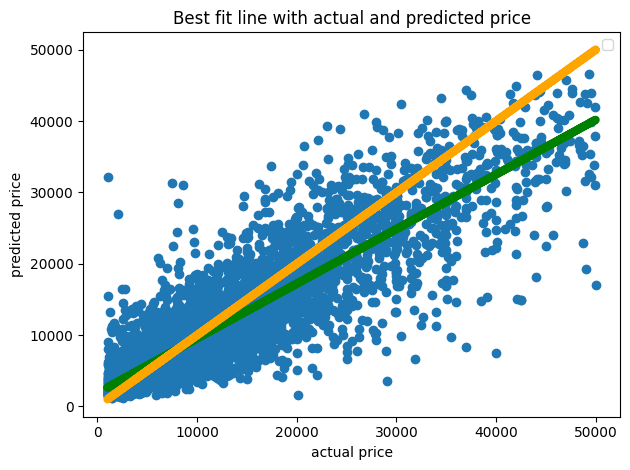

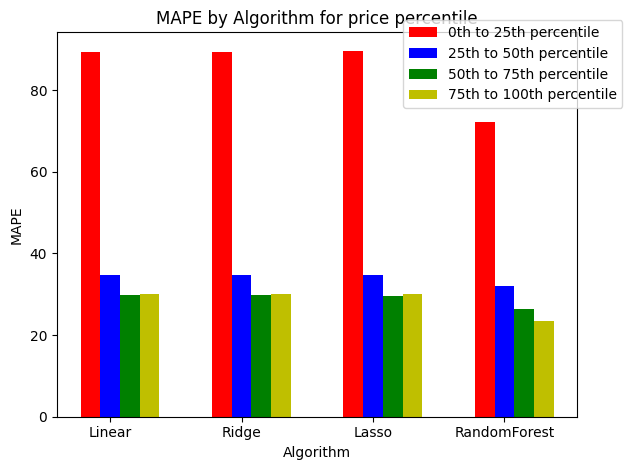

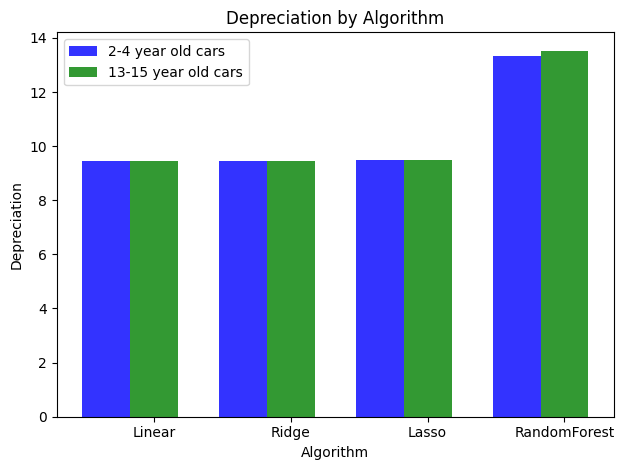

<ipython-input-37-3e5cefc59bde>:480: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mileage'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")
<ipython-input-37-3e5cefc59bde>:483: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'], hist=True, kde=True, kde_kws={'linewidt

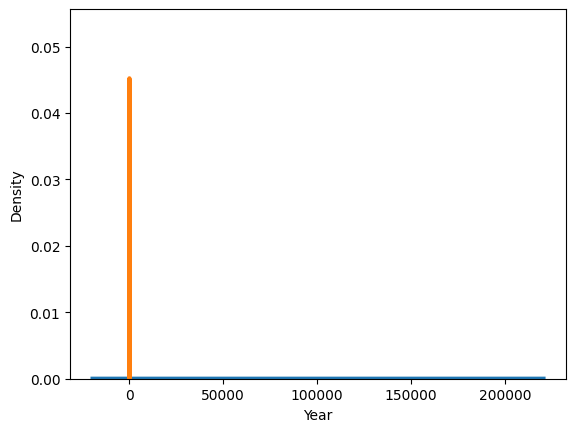

<ipython-input-37-3e5cefc59bde>:487: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Engine'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")


['yearsold', 'Mileage', 'Year', 'Engine', 'Model_1500', 'Model_3-Series', 'Model_300 Series', 'Model_300-Series', 'Model_4Runner', 'Model_5-Series', 'Model_6-Series', 'Model_7-Series', 'Model_911', 'Model_A4', 'Model_A6', 'Model_Acadia', 'Model_Accord', 'Model_Altima', 'Model_Blazer', 'Model_Boxster', 'Model_Bronco', 'Model_C-10', 'Model_C-Class', 'Model_C/K Pickup 1500', 'Model_CR-V', 'Model_CTS', 'Model_Camaro', 'Model_Camry', 'Model_Cayenne', 'Model_Challenger', 'Model_Charger', 'Model_Cherokee', 'Model_Civic', 'Model_Corolla', 'Model_Corvette', 'Model_Crown Victoria', 'Model_DeVille', 'Model_Durango', 'Model_E-Class', 'Model_E-Series Van', 'Model_Edge', 'Model_Eldorado', 'Model_Enclave', 'Model_Equinox', 'Model_Escalade', 'Model_Escape', 'Model_Excursion', 'Model_Expedition', 'Model_Explorer', 'Model_Express', 'Model_F-150', 'Model_F-250', 'Model_F-350', 'Model_Firebird', 'Model_Focus', 'Model_Forester', 'Model_Fusion', 'Model_Grand Caravan', 'Model_Grand Cherokee', 'Model_H2', 'Mo

<ipython-input-37-3e5cefc59bde>:497: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[0], hist=False, kde=True, kde_kws={'linewidth': 1}, label=result[1])
<ipython-input-37-3e5cefc59bde>:497: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[0], hist=False, kde=True, kde

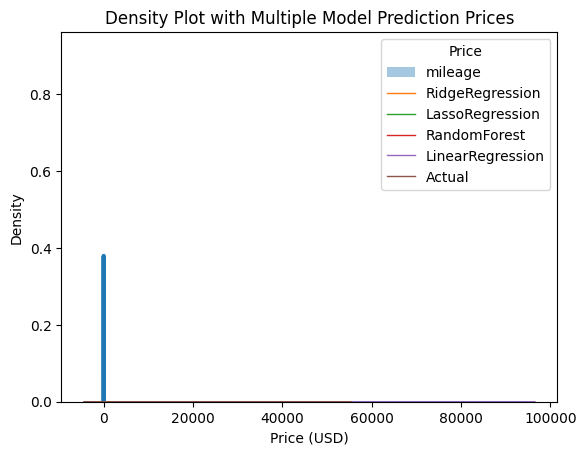

In [ ]:


    # read into pandas dataframe
    df = pd.read_csv("used_car_sales.csv")

    # dropping
    to_drop = ['ID', 'zipcode', 'Trim']


    df.drop(to_drop, inplace=True, axis=1)

    # types left
    print(df.dtypes)
    # pricesold, yearsold, mileage, make, model, year

    # drop missing values
    #df.dropna()

    count_initial = len(df.index)
    print(count_initial)

    # max and min price
    max_price = 50000
    min_price = 1000
    df = df[max_price > df.pricesold]
    df = df[min_price < df.pricesold]
    count_price = len(df.index)
    print("price removed:  " + str(count_initial - count_price) + "  outliers")

    # max and min mileage
    max_mileage = 200000
    min_mileage = 1000
    df = df[max_mileage > df.Mileage]
    df = df[min_mileage < df.Mileage]
    count_mileage = len(df.index)
    print(count_price)
    print("price removed:  " + str(count_price - count_mileage) + "  outliers")

    # make year numeric, and remove outliers
    maximum_age = 50
    minimum_age = 0
    df['Year'] = df['yearsold'] - df['Year']
    df = df[maximum_age > df.Year]
    df = df[minimum_age < df.Year]
    count_age = len(df.index)
    print(count_mileage)
    print("price removed:  " + str(count_mileage - count_age) + "  outliers")


    def try_to_find_from_engine(number, engine_value: str) -> str:
        if number != 0:
            return str(number).strip()
        found = re.search('v[0-9]+', engine_value, re.IGNORECASE)
        if found:
            return found.group()[1:].strip()
        else:
            return np.NaN

    df['NumCylinders'] = df.apply(
        lambda row: try_to_find_from_engine(int(row['NumCylinders']), str(row['Engine'])), axis=1
    )

    engine_patterns = [
        (df['Engine'].str.contains('gas', case=False, regex=False, na=False), 'gas'),
        (df['Engine'].str.contains('diesel', case=False, regex=False, na=False), 'diesel'),
    ]

    criteria, values = zip(*engine_patterns)
    df['FuelType'] = np.select(criteria, values, "unknown")


    body_type_patterns = [
        (df['BodyType'].str.contains('hatchback', case=False, regex=False, na=False), 'hatchback'),
        (df['BodyType'].str.contains('coupe', case=False, regex=False, na=False), 'coupe'),
        (df['BodyType'].str.contains('suv', case=False, regex=False, na=False), 'suv'),
        (df['BodyType'].str.contains('sedan', case=False, regex=False, na=False), 'sedan'),
        (df['BodyType'].str.contains('pickup', case=False, regex=False, na=False), 'pickup'),
        (df['BodyType'].str.contains('truck', case=False, regex=False, na=False), 'pickup'),
        (df['BodyType'].str.contains('convertible', case=False, regex=False, na=False), 'convertible'),
        (df['BodyType'].str.contains('van', case=False, regex=False, na=False), 'van'),
        (df['BodyType'].str.contains('wagon', case=False, regex=False, na=False), 'wagon'),
    ]
    criteria, values = zip(*body_type_patterns)
    df['BodyType'] = np.select(criteria, values, "unknown")

    drive_type_patterns = [
        (df['DriveType'].str.contains('RWD', case=False, regex=False, na=False), 'RWD'),
        (df['DriveType'].str.contains('FWD', case=False, regex=False, na=False), 'FWD'),
        (df['DriveType'].str.contains('4WD', case=False, regex=False, na=False), '4WD'),
        (df['DriveType'].str.contains('AWD', case=False, regex=False, na=False), 'AWD'),
    ]

    criteria, values = zip(*drive_type_patterns)
    df['DriveType'] = np.select(criteria, values, "unknown")

    def convert_engine_to_liters(engine_value: str):
        found = re.search('[0-9]\.[0-9]', engine_value, re.IGNORECASE)
        if found:
            return float(found.group())
        else:
            return np.NaN

    df['Engine'] = df.apply(
        lambda row: convert_engine_to_liters(str(row['Engine'])), axis=1
    )

    df.dropna(subset=['NumCylinders', 'Engine'], inplace=True, axis=0)
    count_engine_numCylinders = len(df.index)
    print(count_age)
    print("price removed:  " + str(count_age - count_engine_numCylinders) + "  outliers")


    # get rid of rare models

    # def delete_occurrences_fewer_than(data, model, threshold: int = 300) -> str:
    #     if len(data[data['Model'] == model]) < threshold:
    #         return 'Rare'
    #     return model
    #
    #
    # df['Model'] = df['Model'].apply(
    #     lambda x: delete_occurrences_fewer_than(data=df, model=x)
    # )
    #df = df.groupby('Model').map((lambda x: x.value_counts() < 200), 'Other')

    df = df.groupby('Make').filter(lambda x: len(x) > 100)
    df['Model'] = df['Model'].mask(df['Model'].map(df['Model'].value_counts()) < 100, np.NaN)
    df.drop('Make', inplace=True, axis=1)
    df = df.groupby('NumCylinders').filter(lambda x: len(x) > 100)

    df.dropna(subset=['Model'], inplace=True, axis=0)
    #df.corr()


    df = pd.get_dummies(data=df)
    # for col in df.columns:
    #     print(col)
    print(df.shape)


    # df_log2['pricesold'] = np.log2(df['pricesold'])

    # splitting
    # df_2019 = df[df["yearsold"] == 2019]
    # df_2020 = df[df["yearsold"] == 2019]
    # to_drop = ['yearsold']
    # df_2019.drop(to_drop, inplace=True, axis=1)
    # df_2020.drop(to_drop, inplace=True, axis=1)

    year_sold_patterns = [
        (df['yearsold'] == 2018, 1),
        (df['yearsold'] == 2019, 2),
        (df['yearsold'] == 2020, 3),
    ]

    criteria, values = zip(*year_sold_patterns)
    df['yearsold'] = np.select(criteria, values, np.NAN)
    df.dropna()


    # df_2019_target = df_2019.pop('pricesold')
    # df_2020_target = df_2020.pop('pricesold')

    percentiles_price = np.percentile(df.pricesold, [25, 50, 75])

    df_target = df.pop('pricesold')

    # price is log2, shown by graph
    df_target_log2 = np.log2(df_target) * 100
    sns.displot(data=df_target_log2, kde=True)
    plt.show()


    # test data

    x_train, x_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2)

    # combine with price for test
    x_test["pricesold"] = y_test

    # make array from percentiles, to try
    percentiles_array = [x_test[x_test["pricesold"].between(0, percentiles_price[0])],
                         x_test[x_test["pricesold"].between(percentiles_price[0], percentiles_price[1])],
                         x_test[x_test["pricesold"].between(percentiles_price[1], percentiles_price[2])],
                         x_test[x_test["pricesold"].between(percentiles_price[2], 50000)]]

    x_test.pop('pricesold')

    # create separate array with price
    percentiles_targets = []
    for p in percentiles_array:
        print(len(p))
        percentiles_targets.append(p.pop('pricesold'))

    y_train_log2 = np.log2(y_train) * 100

    #train, val = train_test_split(train, test_size=0.2)
    print(len(x_train), 'train examples')
    #print(len(val), 'validation examples')
    print(len(x_test), 'test examples')



# sklearn regression

    # Defining MAPE function
    def MAPE(Y_actual, Y_Predicted):
        mape = np.mean(np.abs((Y_actual - Y_Predicted) / Y_actual)) * 100
        return mape

    # Defining prediction plot
    def PLOT_ACTUAL_VS_PREDICTED(Y_actual, Y_predicted, line_of_best_fit=True):

        # add points to plot
        plt.scatter(Y_actual, Y_predicted)
        plt.xlabel('actual price')
        plt.ylabel('predicted price')
        plt.title('Best fit line with actual and predicted price')
        plt.legend()
        plt.tight_layout()

        if(line_of_best_fit):
            # find line of best fit
            a, b = np.polyfit(Y_actual.flatten(), Y_predicted.flatten(), 1)

            # add line of best fit to plot
            plt.plot(Y_actual, a * Y_actual + b, color='green', linewidth=6)
            plt.plot(Y_actual, Y_actual, color='orange', linewidth=6)
        plt.show()



    # linear
    lr = LinearRegression()
    lr.fit(x_train, y_train_log2)
    print("Linear Regression:")

    # # predictions
    # for d in percentiles_array:
    #     pred_train_lr = lr.predict(x_train)
    #     pred_train_lr = np.exp2(pred_train_lr * 0.01)
    #     print(MAPE(y_train, pred_train_lr))

    # predictions
    pred_train_lr = lr.predict(x_train)
    pred_train_lr = np.exp2(pred_train_lr * 0.01)
    print("linear MAPE: "+str(MAPE(y_train, pred_train_lr)))
    print("linear RSME: "+str(np.sqrt(mean_squared_error(y_train, pred_train_lr))))
    print("linear R2: "+str(r2_score(y_train, pred_train_lr)))

    PLOT_ACTUAL_VS_PREDICTED(y_train.values, pred_train_lr)

    pred_test_lr = lr.predict(x_test)
    pred_test_lr = np.exp2(pred_test_lr * 0.01)
    print("linear MAPE: "+str(MAPE(y_test, pred_test_lr)))
    print("linear RSME: "+str(np.sqrt(mean_squared_error(y_test, pred_test_lr))))
    print("linear R2: "+str(r2_score(y_test, pred_test_lr)))

    PLOT_ACTUAL_VS_PREDICTED(y_test.values, pred_test_lr)

    # ridge
    rr = Ridge(alpha=0.01)
    rr.fit(x_train, y_train_log2)
    print("Ridge Regression:")

    # predictions
    pred_train_rr = rr.predict(x_train)
    pred_train_rr = np.exp2(pred_train_rr * 0.01)
    print("ridge MAPE: "+str(MAPE(y_train, pred_train_rr)))
    print("ridge RSME: "+str(np.sqrt(mean_squared_error(y_train, pred_train_rr))))
    print("ridge R2: "+str(r2_score(y_train, pred_train_rr)))

    PLOT_ACTUAL_VS_PREDICTED(y_train.values, pred_train_rr)

    pred_test_rr = rr.predict(x_test)
    pred_test_rr = np.exp2(pred_test_rr * 0.01)
    print("ridge MAPE: "+str(MAPE(y_test, pred_test_rr)))
    print("ridge RSME: "+str(np.sqrt(mean_squared_error(y_test, pred_test_rr))))
    print("ridge R2: "+str(r2_score(y_test, pred_test_rr)))

    PLOT_ACTUAL_VS_PREDICTED(y_test.values, pred_test_rr)


    # Lasso Regression
    model_lasso = Lasso(alpha=0.01)
    model_lasso.fit(x_train, y_train_log2)

    # predictions
    pred_train_lasso = model_lasso.predict(x_train)
    pred_train_lasso = np.exp2(pred_train_lasso * 0.01)
    print("lasso MAPE: "+str(MAPE(y_train, pred_train_lasso)))
    print("lasso RSME: "+str(np.sqrt(mean_squared_error(y_train, pred_train_lasso))))
    print("lasso R2: "+str(r2_score(y_train, pred_train_lasso)))

    PLOT_ACTUAL_VS_PREDICTED(y_train.values, pred_train_lasso)

    pred_test_lasso = model_lasso.predict(x_test)
    pred_test_lasso = np.exp2(pred_test_lasso * 0.01)
    print("lasso MAPE: "+str(MAPE(y_test, pred_test_lasso)))
    print("lasso RSME: "+str(np.sqrt(mean_squared_error(y_test, pred_test_lasso))))
    print("lasso R2: "+str(r2_score(y_test, pred_test_lasso)))

    PLOT_ACTUAL_VS_PREDICTED(y_test.values, pred_test_lasso)


    # Random Forest Regression
    # important to test many times because it is stochastic
    # get a list of models to evaluate
    # def get_models():
    #     models = dict()
    #     # exp2lore number of features from 1 to 7
    #     for i in range(4, 6):
    #         models[str(i)] = RandomForestClassifier(max_features=i)
    #     return models
    #
    # # evaluate a given model using cross-validation
    # def evaluate_model(model, X, y):
    #     # define the evaluation procedure
    #     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #     # evaluate the model and collect the results
    #     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    #     return scores

    # Random Forest
    rf = RandomForestRegressor(random_state=0)
    rf.fit(x_train, y_train_log2)
    print("RF Regression:")

    # predictions
    pred_train_rf = rf.predict(x_train)
    pred_train_rf = np.exp2(pred_train_rf * 0.01)
    print("RF MAPE: "+str(MAPE(y_train, pred_train_rf)))
    print("RF RSME: "+str(np.sqrt(mean_squared_error(y_train, pred_train_rf))))
    print("RF R2: "+str(r2_score(y_train, pred_train_rf)))

    PLOT_ACTUAL_VS_PREDICTED(y_train.values, pred_train_rf)

    pred_test_rf = rf.predict(x_test)
    pred_test_rf = np.exp2(pred_test_rf * 0.01)
    print("RF MAPE: "+str(MAPE(y_test, pred_test_rf)))
    print("RF RSME: "+str(np.sqrt(mean_squared_error(y_test, pred_test_rf))))
    print("RF R2: "+str(r2_score(y_test, pred_test_rf)))

    PLOT_ACTUAL_VS_PREDICTED(y_test.values, pred_test_rf)


# Get MAPE boxplot


    def graph_MAPE_by_price(array_to_predict):

        # create plot
        fig, ax = plt.subplots()
        index = np.arange(4)
        bar_width = 0.15
        opacity = 1
        colors = ['r', 'b', 'g', 'y']

        for i in range(4):

            results = []

            # lr
            pred_test = lr.predict(array_to_predict[i])
            pred_test = np.exp2(pred_test * 0.01)
            results.append(MAPE(percentiles_targets[i], pred_test))

            # rr
            pred_test = rr.predict(array_to_predict[i])
            pred_test = np.exp2(pred_test * 0.01)
            results.append(MAPE(percentiles_targets[i], pred_test))

            # lasso_r
            pred_test = model_lasso.predict(array_to_predict[i])
            pred_test = np.exp2(pred_test * 0.01)
            results.append(MAPE(percentiles_targets[i], pred_test))

            # rf
            pred_test = rf.predict(array_to_predict[i])
            pred_test = np.exp2(pred_test * 0.01)
            results.append(MAPE(percentiles_targets[i], pred_test))

            rects = plt.bar(index + bar_width * i, results, bar_width,
                            alpha=opacity,
                            color=colors[i],
                            label=str(i * 25) + 'th to '+str((i+1) * 25) + 'th percentile')

        plt.xlabel('Algorithm')
        plt.ylabel('MAPE')
        plt.title('MAPE by Algorithm for price percentile')
        plt.xticks(index + bar_width, ('Linear', 'Ridge', 'Lasso', 'RandomForest'))
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.tight_layout()
        plt.show()


    graph_MAPE_by_price(percentiles_array)


    # numeric features
    # numeric_feature_names = ['mileage', 'hp', 'year']
    # numeric_features = df[numeric_feature_names]
    # numeric_features.sort_values(['hp'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
    # print(numeric_features)
    # print(numeric_features.dtypes)
    # print(numeric_features.shape)


# plot the density histograms

    def increment_year(dataframe):
        dataframe["Year"] += 1
        dataframe["yearsold"] += 1
        dataframe["Mileage"] += 14263

    # return average prediction list from dataframe array
    # feed for one year
    # return list for 2019, 2018
    def get_average_prediction(df_arr):

        def percentage_difference(result_old, result_new):
            result_old = np.average(np.exp2(result_old * 0.01))
            result_new = np.average(np.exp2(result_new * 0.01))
            decrease = result_old - result_new
            return (decrease / result_old) * 100

        linreg = percentage_difference(lr.predict(df_arr[0]), lr.predict(df_arr[1]))
        ridgereg = percentage_difference(rr.predict(df_arr[0]), rr.predict(df_arr[1]))
        lassoreg = percentage_difference(model_lasso.predict(df_arr[0]), model_lasso.predict(df_arr[1]))
        randomreg = percentage_difference(rf.predict(df_arr[0]), rf.predict(df_arr[1]))

        # return tuple with all data for one year
        # actual data too?
        return linreg, ridgereg, lassoreg, randomreg



    # 2019 dataset
    df_2019 = df[df["yearsold"] == 2]

    # split into 2-4
    df_2019_newer = df_2019[df_2019["Year"].between(2, 4)]

    df_2020_newer = df_2019_newer.copy()
    increment_year(df_2020_newer)

    newer_depreciation = get_average_prediction([df_2019_newer, df_2020_newer])

    # split into 13-15
    df_2019_older = df_2019[df_2019["Year"].between(13, 15)]

    df_2020_older = df_2019_older.copy()
    increment_year(df_2020_older)

    older_depreciation = get_average_prediction([df_2019_older, df_2020_older])

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(4)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, newer_depreciation, bar_width,
                     alpha=opacity,
                     color='b',
                     label='2-4 year old cars')

    rects2 = plt.bar(index + bar_width, older_depreciation, bar_width,
                     alpha=opacity,
                     color='g',
                     label='13-15 year old cars')

    plt.xlabel('Algorithm')
    plt.ylabel('Depreciation')
    plt.title('Depreciation by Algorithm')
    plt.xticks(index + bar_width, ('Linear', 'Ridge', 'Lasso', 'RandomForest'))
    plt.legend()
    plt.tight_layout()
    plt.show()

    # find the most common occurrences all columns in dataframe
    # most common mileage: 100,000
    sns.distplot(df['Mileage'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")

    # most common Year: 5-15
    sns.distplot(df['Year'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")
    plt.show()

    # most common Engine: 3.8 - 4.8
    sns.distplot(df['Engine'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")

    print(list(df))


    model_results = [(pred_test_rr, 'RidgeRegression'), (pred_test_lasso, 'LassoRegression'), (pred_test_rf, 'RandomForest'), (pred_test_lr, 'LinearRegression')]

    for i in range(4):
        # Draw the density plot
        result = model_results[i]
        sns.distplot(result[0], hist=False, kde=True, kde_kws={'linewidth': 1}, label=result[1])

    sns.distplot(y_test.values, hist=False, kde=True, kde_kws={'linewidth': 1}, label='Actual')

    # Plot formatting
    plt.legend(title='Price')
    plt.title('Density Plot with Multiple Model Prediction Prices')
    plt.xlabel('Price (USD)')
    plt.ylabel('Density')
    plt.show()













<ipython-input-16-b416db703a07>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mileage'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")


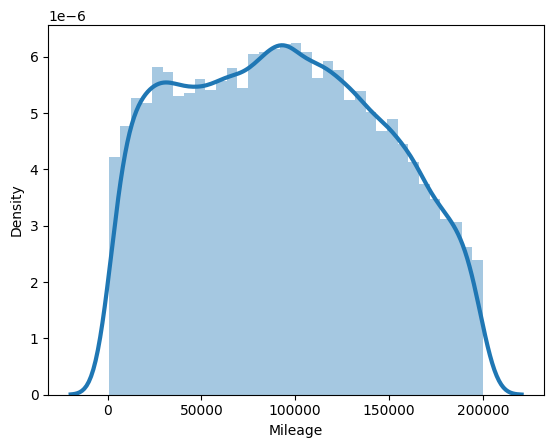

In [ ]:
sns.distplot(df['Mileage'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")
plt.show()


<ipython-input-17-f10485ea5b97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")


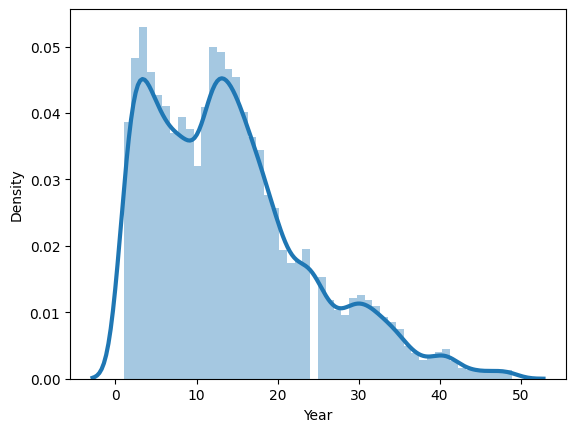

In [ ]:
sns.distplot(df['Year'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")
plt.show()


<ipython-input-18-0da71dec8133>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Engine'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")


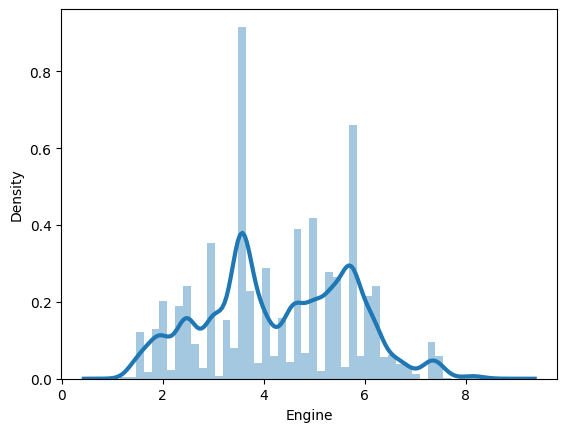

In [ ]:
sns.distplot(df['Engine'], hist=True, kde=True, kde_kws={'linewidth': 3}, label="mileage")
plt.show()


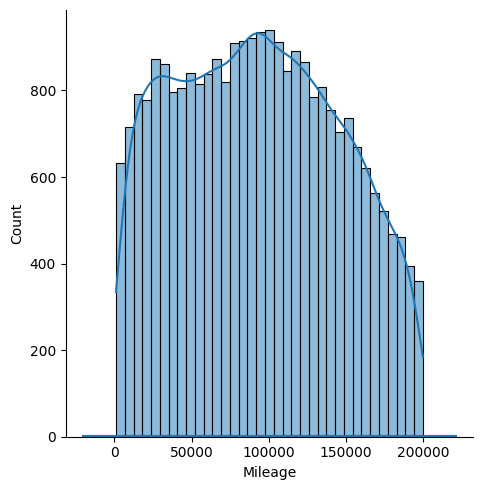

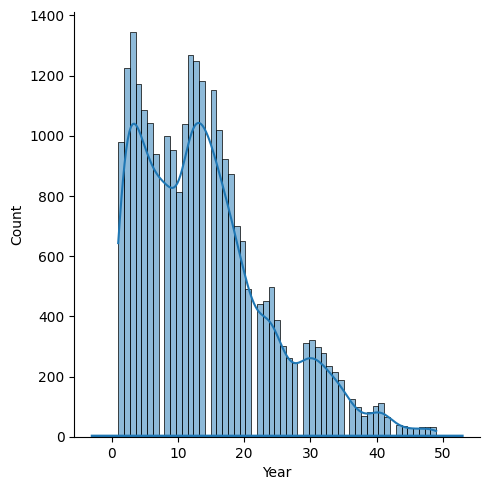

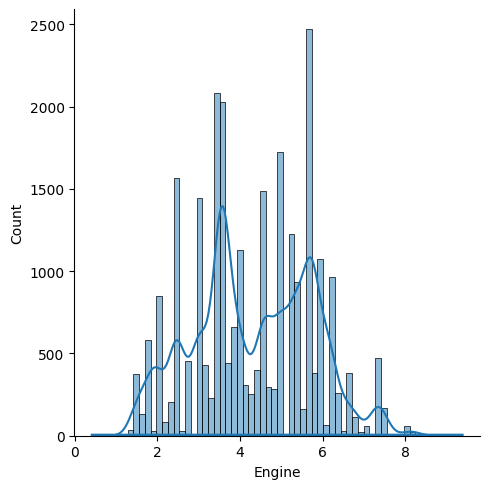

['yearsold', 'Mileage', 'Year', 'Engine', 'Model_1500', 'Model_3-Series', 'Model_300 Series', 'Model_300-Series', 'Model_4Runner', 'Model_5-Series', 'Model_6-Series', 'Model_7-Series', 'Model_911', 'Model_A4', 'Model_A6', 'Model_Acadia', 'Model_Accord', 'Model_Altima', 'Model_Blazer', 'Model_Boxster', 'Model_Bronco', 'Model_C-10', 'Model_C-Class', 'Model_C/K Pickup 1500', 'Model_CR-V', 'Model_CTS', 'Model_Camaro', 'Model_Camry', 'Model_Cayenne', 'Model_Challenger', 'Model_Charger', 'Model_Cherokee', 'Model_Civic', 'Model_Corolla', 'Model_Corvette', 'Model_Crown Victoria', 'Model_DeVille', 'Model_Durango', 'Model_E-Class', 'Model_E-Series Van', 'Model_Edge', 'Model_Eldorado', 'Model_Enclave', 'Model_Equinox', 'Model_Escalade', 'Model_Escape', 'Model_Excursion', 'Model_Expedition', 'Model_Explorer', 'Model_Express', 'Model_F-150', 'Model_F-250', 'Model_F-350', 'Model_Firebird', 'Model_Focus', 'Model_Forester', 'Model_Fusion', 'Model_Grand Caravan', 'Model_Grand Cherokee', 'Model_H2', 'Mo

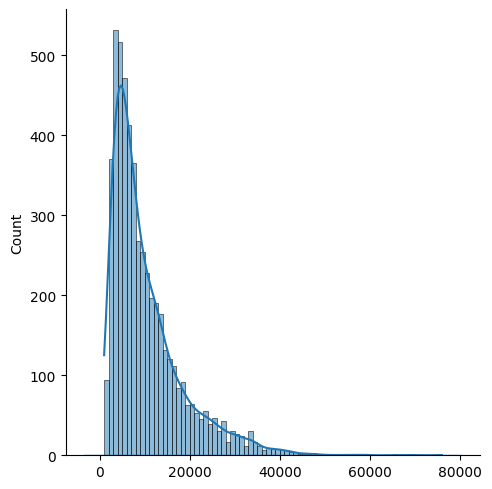

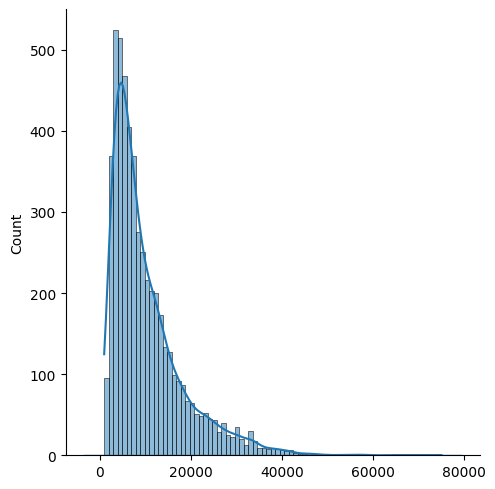

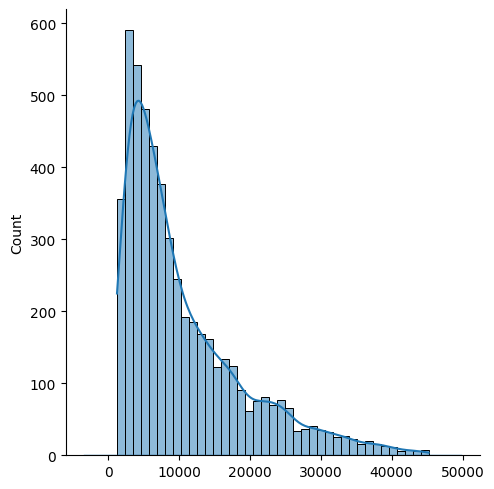

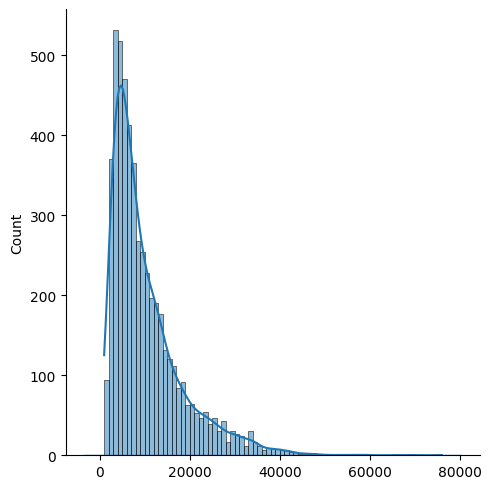

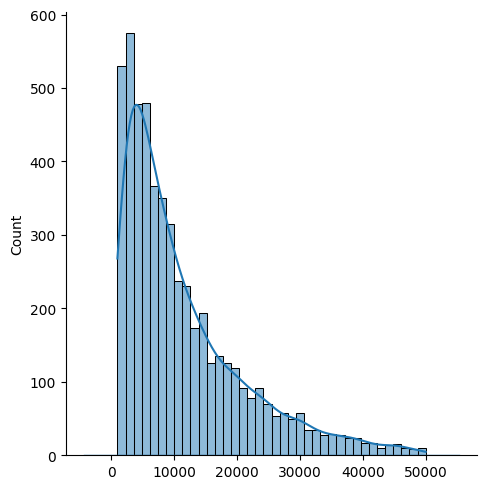

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Most common mileage: 100,000
sns.displot(df['Mileage'], kde=True, label="Mileage")
sns.kdeplot(df['Mileage'], linewidth=3)  # Specify the linewidth directly for kdeplot
plt.show()

# Most common Year: 5-15
sns.displot(df['Year'], kde=True, label="Year")
sns.kdeplot(df['Year'], linewidth=3)
plt.show()

# Most common Engine: 3.8 - 4.8
sns.displot(df['Engine'], kde=True, label="Engine")
sns.kdeplot(df['Engine'], linewidth=3)
plt.show()

print(list(df))

model_results = [
    (pred_test_rr, 'RidgeRegression'),
    (pred_test_lasso, 'LassoRegression'),
    (pred_test_rf, 'RandomForest'),
    (pred_test_lr, 'LinearRegression')
]

for i in range(4):
    # Draw the density plot
    result = model_results[i]
    sns.displot(result[0], kde=True, label=result[1])
    sns.kdeplot(result[0], linewidth=1)
    plt.show()

sns.displot(y_test.values, kde=True, label='Actual')
sns.kdeplot(y_test.values, linewidth=1)
plt.show()


<ipython-input-30-09c6eb27e06f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[0], hist=False, kde=True, kde_kws={'linewidth': 1}, label=result[1])
<ipython-input-30-09c6eb27e06f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[0], hist=False, kde=True, kde_kws

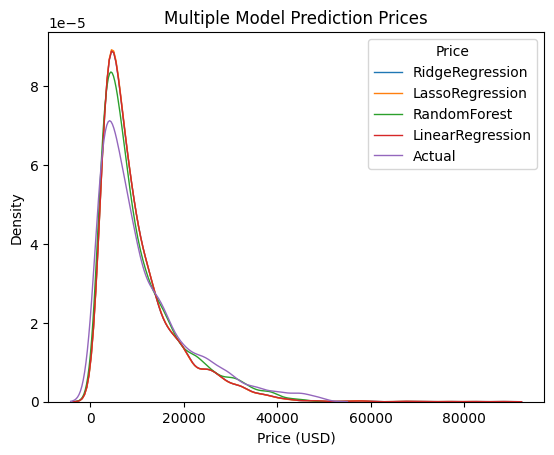

In [ ]:
for i in range(4):
    result = model_results[i]
    sns.distplot(result[0], hist=False, kde=True, kde_kws={'linewidth': 1}, label=result[1])
sns.distplot(y_test.values, hist=False, kde=True, kde_kws={'linewidth': 1}, label='Actual')
plt.legend(title='Price')
plt.title('Multiple Model Prediction Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.show()


# Customizing Charts

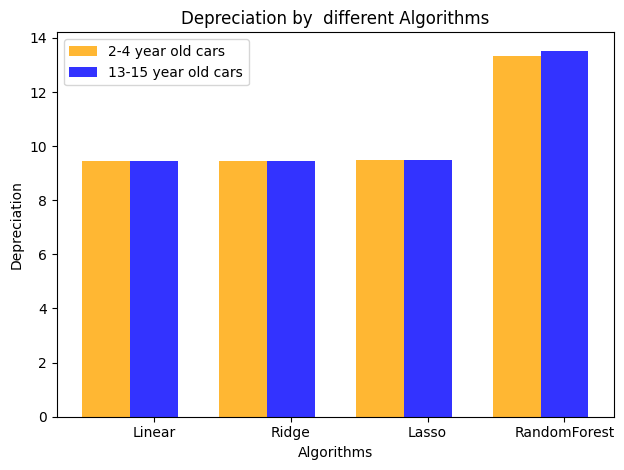

In [ ]:
# Plot
rects1 = plt.bar(index, newer_depreciation, bar_width, alpha=opacity, color='orange', label='2-4 year old cars')
rects2 = plt.bar(index + bar_width, older_depreciation, bar_width, alpha=opacity, color='blue', label='13-15 year old cars')

# Customizing plot
plt.xlabel('Algorithms')
plt.ylabel('Depreciation')
plt.title('Depreciation by  different Algorithms')
plt.xticks(index + bar_width, ('Linear', 'Ridge', 'Lasso', 'RandomForest'))
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

<ipython-input-43-e71a4df6781a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[0], hist=False, kde=True, kde_kws={'linewidth': 1, 'color': colors[i]}, label=result[1])
<ipython-input-43-e71a4df6781a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[0], hist=Fals

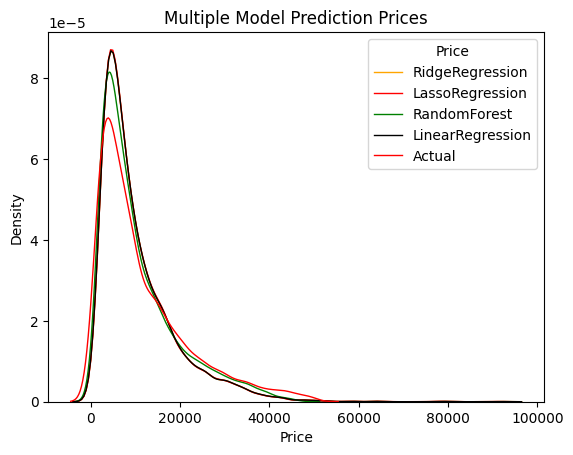

In [ ]:
# Define colors
colors = ['orange', 'red', 'green', 'black', 'purple']

# Plot KDE plots for each model result
for i in range(4):
    result = model_results[i]
    sns.distplot(result[0], hist=False, kde=True, kde_kws={'linewidth': 1, 'color': colors[i]}, label=result[1])

# Plot KDE plot for actual values
sns.distplot(y_test.values, hist=False, kde=True, kde_kws={'linewidth': 1, 'color': 'red'}, label='Actual')

# Customizing plot
plt.legend(title='Price')
plt.title('Multiple Model Prediction Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

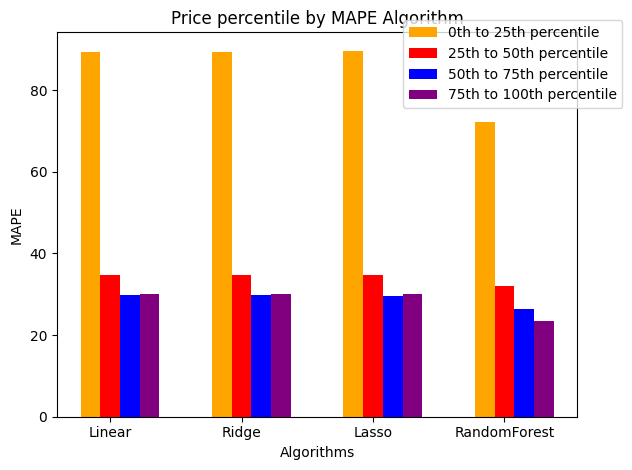

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def graph_MAPE_by_price(array_to_predict):

    # Create plot
    fig, ax = plt.subplots()
    index = np.arange(4)
    bar_width = 0.15
    opacity = 1
    colors = ['orange', 'red', 'blue', 'purple']  # Modify colors here

    for i in range(4):
        results = []

        # lr
        pred_test = lr.predict(array_to_predict[i])
        pred_test = np.exp2(pred_test * 0.01)
        results.append(MAPE(percentiles_targets[i], pred_test))

        # rr
        pred_test = rr.predict(array_to_predict[i])
        pred_test = np.exp2(pred_test * 0.01)
        results.append(MAPE(percentiles_targets[i], pred_test))

        # lasso_r
        pred_test = model_lasso.predict(array_to_predict[i])
        pred_test = np.exp2(pred_test * 0.01)
        results.append(MAPE(percentiles_targets[i], pred_test))

        # rf
        pred_test = rf.predict(array_to_predict[i])
        pred_test = np.exp2(pred_test * 0.01)
        results.append(MAPE(percentiles_targets[i], pred_test))

        rects = plt.bar(index + bar_width * i, results, bar_width,
                        alpha=opacity,
                        color=colors[i],
                        label=str(i * 25) + 'th to '+str((i+1) * 25) + 'th percentile')

    plt.xlabel('Algorithms')
    plt.ylabel('MAPE')
    plt.title('Price percentile by MAPE Algorithm')
    plt.xticks(index + bar_width, ('Linear', 'Ridge', 'Lasso', 'RandomForest'))
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.tight_layout()
    plt.show()

graph_MAPE_by_price(percentiles_array)


In [ ]:
# Defining prediction plot
def PLOT_ACTUAL_VS_PREDICTED(Y_actual, Y_predicted, line_of_best_fit=True):

    # Add points to plot with orange color
    plt.scatter(Y_actual, Y_predicted, color='orange', label='Predicted vs Actual')

    plt.xlabel('actual price')
    plt.ylabel('predicted price')
    plt.title('Best fit line with actual and predicted price')
    plt.legend()
    plt.tight_layout()

    if(line_of_best_fit):
        # find line of best fit
        a, b = np.polyfit(Y_actual.flatten(), Y_predicted.flatten(), 1)

        # add line of best fit to plot
        plt.plot(Y_actual, a * Y_actual + b, color='green', linewidth=6)
        plt.plot(Y_actual, Y_actual, color='red', linewidth=6)
    plt.show()


In [ ]:
# Fit your regression models (lr, rr, model_lasso) before running this code

# Extract feature names
feature_names = df.columns

# Create a table header
print("MODEL\tFEATURE COEFFICIENTS")

# Loop through each model
for model_name, model in [("LINEAR REGRESSION", lr),
                           ("RIDGE REGRESSION", rr),
                           ("LASSO REGRESSION", model_lasso)]:
    # Get coefficients from the model
    coefficients = model.coef_

    # Print model name
    print(model_name)

    # Print feature coefficients
    for feature_name, coef in zip(feature_names, coefficients):
        print(f"{feature_name}\t{coef:.4f}")

    print("\n")  # Add a newline between models


MODEL	FEATURE COEFFICIENTS
LINEAR REGRESSION
yearsold	9.3502
Mileage	-0.0012
Year	-5.5789
Engine	29.6578
Model_1500	8993526.0152
Model_3-Series	8993571.6430
Model_300 Series	8993526.8578
Model_300-Series	8993633.2913
Model_4Runner	8993605.4687
Model_5-Series	8993567.2221
Model_6-Series	8993619.4876
Model_7-Series	8993566.7584
Model_911	8993793.5632
Model_A4	8993510.1030
Model_A6	8993553.1100
Model_Acadia	8993552.9886
Model_Accord	8993533.1636
Model_Altima	8993484.0556
Model_Blazer	8993538.4395
Model_Boxster	8993611.3963
Model_Bronco	8993626.1665
Model_C-10	8993663.4768
Model_C-Class	8993540.2520
Model_C/K Pickup 1500	8993561.8117
Model_CR-V	8993538.2315
Model_CTS	8993543.5640
Model_Camaro	8993554.1613
Model_Camry	8993538.0222
Model_Cayenne	8993608.3271
Model_Challenger	8993553.1737
Model_Charger	8993526.2959
Model_Cherokee	8993548.6398
Model_Civic	8993519.1144
Model_Corolla	8993516.9811
Model_Corvette	8993578.0350
Model_Crown Victoria	8993426.5565
Model_DeVille	8993469.6129
Model_Duran

In [ ]:
# Define the headers for the table
print("PERCENTILE\tSTART PRICE\tEND PRICE")

# Define the percentile labels and corresponding start and end prices
percentile_labels = ["0TH-25TH", "25TH-50TH", "50TH-75TH", "75TH-100TH"]
start_prices = [min_price, percentiles_price[0], percentiles_price[1], percentiles_price[2]]
end_prices = [percentiles_price[0], percentiles_price[1], percentiles_price[2], max_price]

# Iterate through the percentiles and print the corresponding start and end prices
for label, start_price, end_price in zip(percentile_labels, start_prices, end_prices):
    print(f"{label}\t\t${start_price:.2f}\t\t${end_price:.2f}")


PERCENTILE	START PRICE	END PRICE
0TH-25TH		$1000.00		$4050.00
25TH-50TH		$4050.00		$8050.00
50TH-75TH		$8050.00		$15500.00
75TH-100TH		$15500.00		$50000.00


In [ ]:
df.describe()

,yearsold,Mileage,Year,Engine,Model_1500,Model_3-Series,Model_300 Series,Model_300-Series,Model_4Runner,Model_5-Series,...,NumCylinders_6,NumCylinders_8,DriveType_4WD,DriveType_AWD,DriveType_FWD,DriveType_RWD,DriveType_unknown,FuelType_diesel,FuelType_gas,FuelType_unknown
count,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,...,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000,26422.000000
mean,2.372228,93189.599198,14.163311,4.319590,0.004352,0.021119,0.005488,0.005374,0.011468,0.009992,...,0.356900,0.489706,0.295057,0.112596,0.152600,0.328401,0.111347,0.040497,0.110892,0.848611
std,0.503428,52704.345670,9.778808,1.434038,0.065830,0.143783,0.073878,0.073114,0.106474,0.099460,...,0.479094,0.499903,0.456077,0.316104,0.359608,0.469640,0.314567,0.197124,0.314005,0.358434
min,1.000000,1011.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,48851.000000,6.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,92000.000000,13.000000,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,134898.250000,19.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,199999.000000,49.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
